<h2>Fase 1: Business Understanding</h2>


<h5>Importar librerías y base de datos</h5>

<h5>Esto hay que cambiarlo, solo es lo del pdf. Hay que incluir una hipotesis de como podemos ayudar al Dormamu</h5>

<p>
Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su
comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos
hacen de sus productos financieros

Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que
sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes,
preparar una estrategia y abordar a este nuevo mercado.
</p>

<h3>Revisar con chatgpt</h3>Decidimos concentrarnos en el uso de tarjeta de credito del cliente ya que nosotros hipotetizamos que es en donde se mueve mas dinero para el cliente y donde podriamos ver mas posibles ganancias que podrian darle interes al banco Dormamu

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [3]:
MONOPOLY_XLSX ='Base_clientes_Monopoly.xlsx'
MONOPOLY_CSV ='Base_clientes_Monopoly_otro.csv'

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [5]:
df = pd.read_excel(MONOPOLY_XLSX)
df.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0


<h2>Fase 2: Data Understanding</h2>

<p>Region<br>
Renta<br>
Edad<br>
Adicional<br>
Consumo<br>
Cuentas<br>
Monoproducto ________________________| Indicador de si el cliente es solo poseedor de una TC<br> 
TC<br>
Dualidad ___________________________| Indicador de Dualidad (Cliente es dual si tiene 2 o mas TC)<br><br>
CUPO_L1 ____________________________| Cupo de la tarjeta credito para compras nacionales<br>
CUPO_MX ____________________________| Cupo de la tarjeta credito para compras internacionales<br>
FlgActCOL_T12_______________________| Indicador de actividad en avances en cuotas con tasa en el mes X en la TC<br>
Txs_T12_____________________________| Numero de transacciones realizados por el cliente en TC en el mes X<br></p>

In [6]:
print(df.shape)
print(df.dtypes)
print(df.info())

(51124, 574)
Id               int64
Subsegmento      int64
Sexo            object
Region         float64
Edad             int64
                ...   
UsoL1_T01      float64
UsoL2_T01        int64
UsoLI_T01      float64
IndRev_T01      object
target           int64
Length: 574, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB
None


In [7]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95, 1]
df_1 = pd.DataFrame(df['TC'].quantile(percentages))
df_1.index = [f'{p * 100}%' for p in percentages]
print(df_1.transpose())

    5.0%  25.0%  50.0%  75.0%  95.0%  100%
TC   1.0    1.0    2.0    2.0    3.0  12.0


In [39]:
max_cards_customer = df.loc[df['TC'].idxmax()]
print(f"The customer with the most credit cards is {max_cards_customer['Id']} with {max_cards_customer['TC']} credit cards.")

The customer with the most credit cards is 2718 with 12 credit cards.


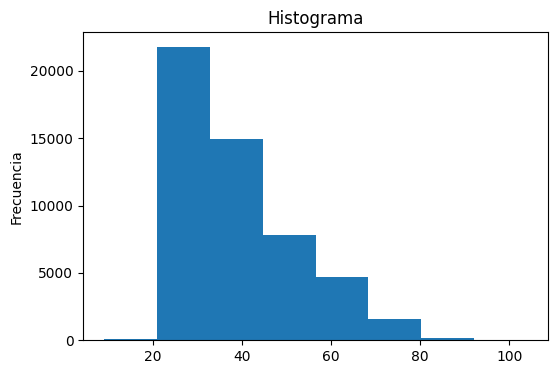

In [23]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(df["Edad"], bins = 8)

plt.xlabel("")
plt.ylabel("Frecuencia")
plt.title("Histograma");

In [54]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_categoric = df[categorical_columns]
print(categorical_columns)

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_features]
print(numeric_features)

Index(['Sexo', 'IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09',
       'IndRev_T08', 'IndRev_T07', 'IndRev_T06', 'IndRev_T05', 'IndRev_T04',
       'IndRev_T03', 'IndRev_T02', 'IndRev_T01'],
      dtype='object')
Index(['Id', 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto',
       ...
       'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01',
       'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target'],
      dtype='object', length=561)


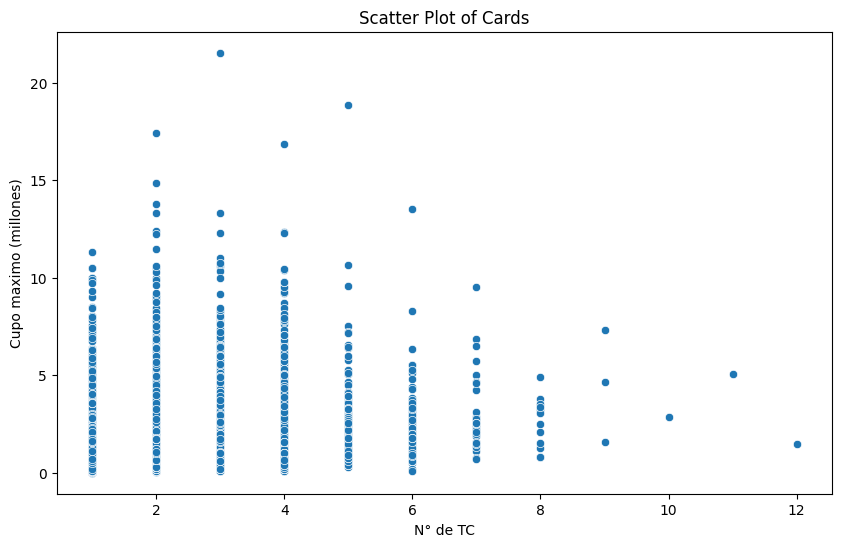

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TC', y=df['CUPO_L1']/1000000, data=df)
plt.title('Scatter Plot of Cards')
plt.xlabel('N° de TC')
plt.ylabel('Cupo maximo (millones)')
plt.show()

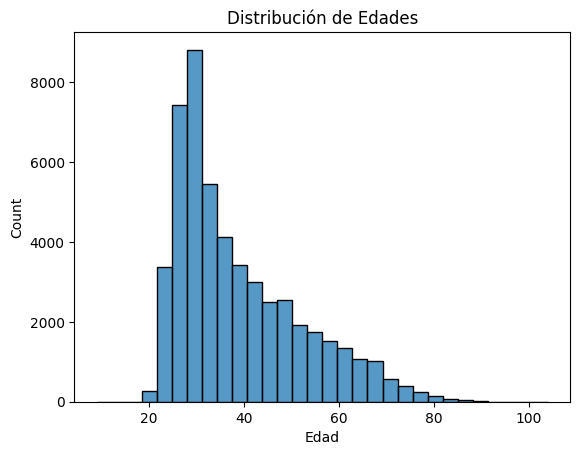

In [40]:
# Histograma de la variable Edad
sns.histplot(data=df, x='Edad', bins=30)
plt.title('Distribución de Edades')
plt.show()

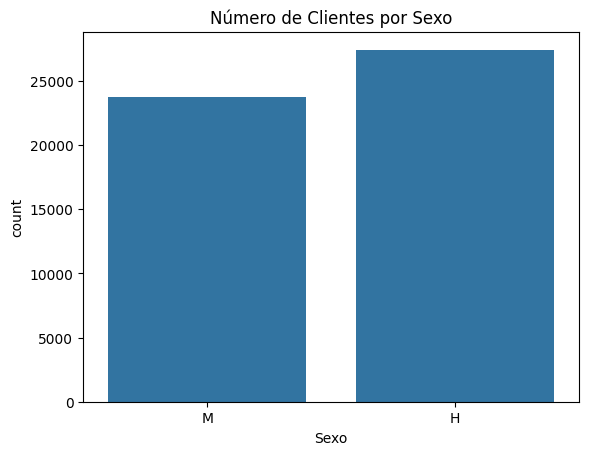

In [41]:
# Gráfico de barras del número de clientes por sexo
sns.countplot(data=df, x='Sexo')
plt.title('Número de Clientes por Sexo')
plt.show()

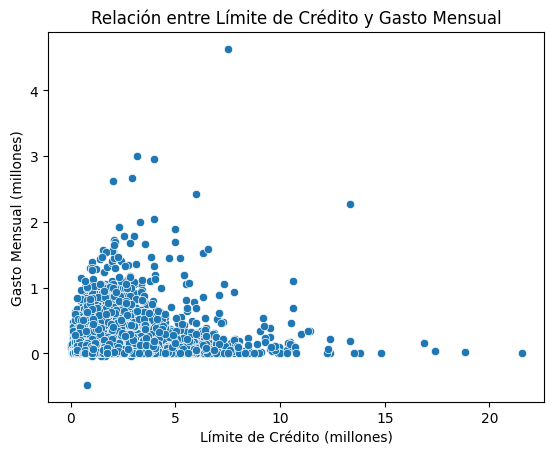

In [51]:
# Diagrama de dispersión entre límite de crédito y gasto mensual
sns.scatterplot(data=df, x=df['CUPO_L1']/1000000, y=df['Fac_T12']/1000000)
plt.title('Relación entre Límite de Crédito y Gasto Mensual')
plt.xlabel('Límite de Crédito (millones)')
plt.ylabel('Gasto Mensual (millones)')
plt.show()

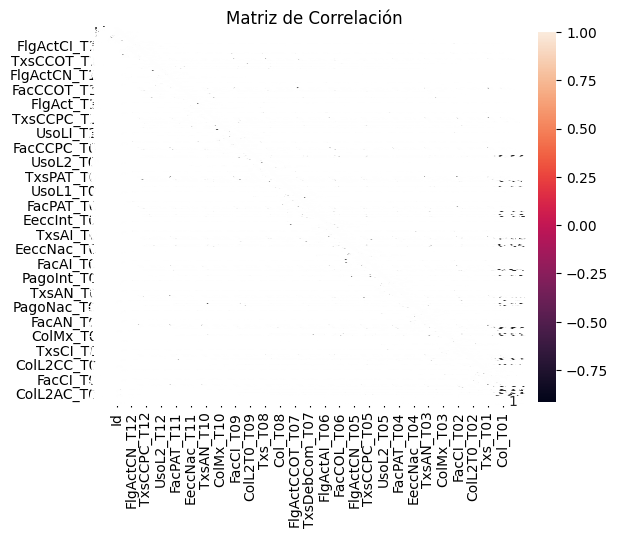

In [55]:
# Matriz de correlación
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

In [32]:
df.isnull().sum()

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

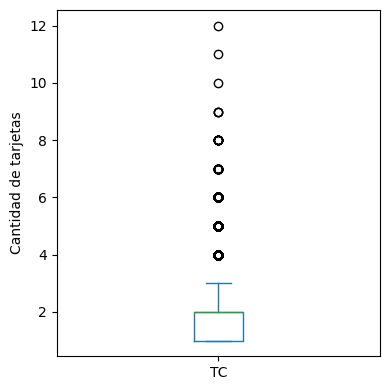

In [42]:
ax = (df['TC']).plot.box(figsize=(4, 4))
ax.set_ylabel('Cantidad de tarjetas')

plt.tight_layout()
plt.show()

<h2>Fase 3: Data Preparation</h2>